### Libraries

* torchvision
* torchvision.datasets - get dataset and data loading functions for computer vision
* torchvision.models - pretrained models
* torchvision.transforms - functions for manipulating data
* torch.utils.data.Dataset - base dataset class for Pytorch
* torch.utils.data.DataLoader- creates a Pytthon iterable over a dataset

In [147]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

### Getting a dataset

In [148]:
# Getting training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # do we want training dataset
    download=True,  # do we want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

# Getting testing data
test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # do we want training dataset
    download=True,  # do we want to download
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

In [149]:
len(train_data), len(test_data)

(60000, 10000)

In [150]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [151]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [152]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [153]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

In [154]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

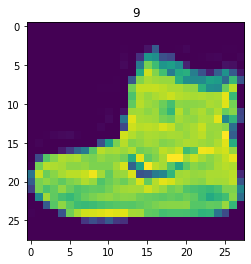

In [155]:
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

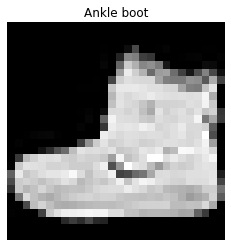

In [156]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

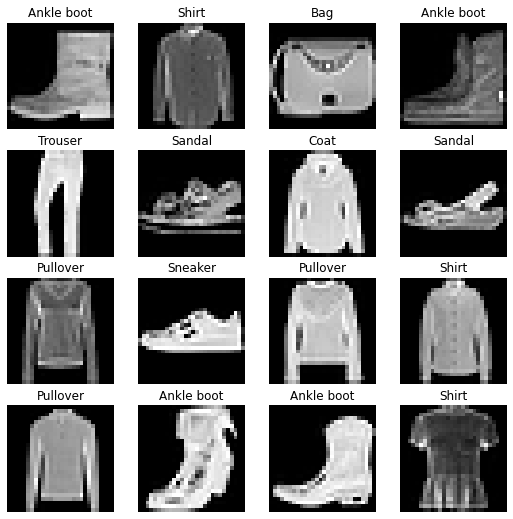

In [157]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

### Prepare dataloader

Right now, the data is sin for a PyTorch datasets

A dataloader will turn it into a Python iterable

More specifically, we want to turn the data into smaller batches (mini-batches)

We do this to...
1. Computationally efficient
2. Gives the neural network more changes to update its gradients per epoch

In [158]:
from torch.utils.data import DataLoader

In [159]:
# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x11da0aa30>,
 <torch.utils.data.dataloader.DataLoader at 0x11da0ab20>)

In [160]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(torch.Size([1, 28, 28]), tensor(8))

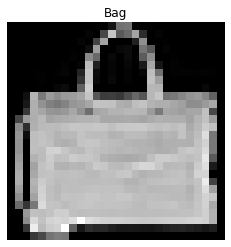

In [161]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

img.shape, label


### Build a baseline model

When starting to build a series of machine learning modelling experiments, best practice is to start with a baseline model

A baseline model is a simple model we will improve on with subsequent models/experiments

Start simple and then add complexity when needed

In [162]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample 
output = flatten_model(x) # forward pass

# Print out what happened
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [163]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [164]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [165]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer and evaluation metrics

* Since we're working with multiclass data, loss function will be nn.CrossEntropyLoss()
* Optimizer will bbe torch.optim.SDG()
* Evaluation metric will be accuracy

In [166]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

helper_functions.py already exists, skipping download


In [167]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### Creating function to time experiments

In [168]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float):
    """"Prints difference between start and end time."""
    total_time = end-start
    print(f"Train time: {total_time:.3f} seconds")
    return total_time

### Training and testing loop with batches of data

1. Loop through epochs
2. Loop through training batches, perfrom training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch

In [169]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start = timer()

# Number of epochs (start small for faster training)
epochs = 3

# Training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)

            # Calculate test loss (accumulatively)
            test_loss += loss_fn(test_pred,  y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss and acc average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:4f} | Test acc: {test_acc:.4f}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(train_time_start, train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:20<00:40, 20.14s/it]


Train loss: 0.5904 | Test loss: 0.509535 | Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:37<00:18, 18.40s/it]


Train loss: 0.4763 | Test loss: 0.479890 | Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:49<00:00, 16.51s/it]


Train loss: 0.4550 | Test loss: 0.476639 | Test acc: 83.4265
Train time: 49.534 seconds


### Make predictions and get results

In [170]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary conntaining the results of mmodel predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [171]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 191.01it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

### Building a better model with non-linearity

In [172]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [173]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))

### Loss, optimizer, evaluation metrics

In [174]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### Functionizing training and testing loop

In [175]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    """Performs a training with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()


    for batch, (X, y) in enumerate(data_loader):
        model_0.train()

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader) 
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [176]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Performs a testing loop step onn model going over data_loader."""
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Forward pass
            test_pred = model(X_test)

            # Calculate test loss (accumulatively)
            test_loss += loss_fn(test_pred,  y_test)

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss and acc average per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [177]:
torch.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn)

train_time_end = timer()
total_train_time_model_1 = print_train_time(train_time_start, train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:13<00:27, 13.74s/it]

Test loss: 0.95637 | Test acc: 65.00%

Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:27<00:13, 13.84s/it]

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:42<00:00, 14.22s/it]

Test loss: 0.68500 | Test acc: 75.02%

Train time: 42.675 seconds


In [178]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 213.54it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

### Building Convolutional Neural Network (CNN)

CNNs are known for their ability to find patterns in visual data

In [179]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, 
                 input_shape:int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this.. send through random tensor 
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [180]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

#### Stepping through nn.Conv2d

In [181]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [182]:
# Create single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1)

# Pass the data through the layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

#### Stepping through nn.MaxPool2d

In [183]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass through conv layer first
test_image_through_conv = conv_layer(test_image)

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)

test_image_through_conv.shape, test_image_through_conv_and_max_pool.shape

(torch.Size([10, 64, 64]), torch.Size([10, 32, 32]))

In [184]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28))

model_2(rand_image_tensor)

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], grad_fn=<AddmmBackward0>)

In [185]:
# Loss functions, optimizer, eval functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### Training and testing model 2

In [186]:
torch.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn)

train_time_end = timer()
total_train_time_model_2 = print_train_time(train_time_start, train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59312 | Train acc: 78.40%


 33%|███▎      | 1/3 [00:48<01:36, 48.43s/it]

Test loss: 0.39936 | Test acc: 85.74%

Epoch: 1
-----
Train loss: 0.35938 | Train acc: 87.10%


 67%|██████▋   | 2/3 [01:31<00:45, 45.25s/it]

Test loss: 0.34326 | Test acc: 87.55%

Epoch: 2
-----
Train loss: 0.32006 | Train acc: 88.33%


100%|██████████| 3/3 [02:13<00:00, 44.54s/it]

Test loss: 0.32130 | Test acc: 88.38%

Train time: 133.641 seconds


In [187]:
# Model 2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

100%|██████████| 313/313 [00:07<00:00, 40.62it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212989866733551,
 'model_acc': 88.37859424920129}

### Compare results

In [190]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321299,88.378594


In [191]:
# Add training time to comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,49.533817
1,FashionMNISTModelV1,0.685001,75.019968,42.674684
2,FashionMNISTModelV2,0.321299,88.378594,133.640786


Text(0, 0.5, 'model')

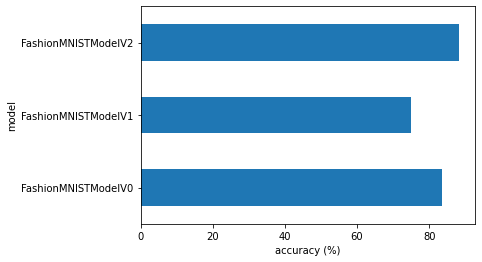

In [195]:
# Visualize results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Make and evaluate randomo predictions with best model

In [215]:
def make_predictions(model: torch.nn.Module,
                     data: list):
    pred_probs =  []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension)
            sample = torch.unsqueeze(sample, dim=0)
            # Forward pass 
            pred_logit = model(sample)
            # Get prediction prob
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
    return torch.stack(pred_probs)

In [236]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

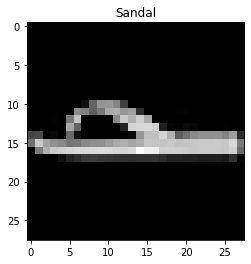

In [237]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [238]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[2.0377e-04, 8.8636e-06, 1.4527e-04, 1.8781e-03, 3.0752e-06, 9.9139e-01,
         1.9047e-05, 1.4766e-03, 4.8689e-03, 6.7162e-06],
        [1.2502e-01, 2.0954e-03, 3.0536e-01, 2.7419e-02, 8.7544e-03, 1.2587e-03,
         4.8404e-01, 2.5024e-03, 4.2058e-02, 1.4881e-03]])

In [239]:
# Covert prediction probs to labels
pred_classes = pred_probs.argmax(dim=1)

pred_classes

tensor([5, 6, 0, 1, 2, 2, 1, 4, 4])

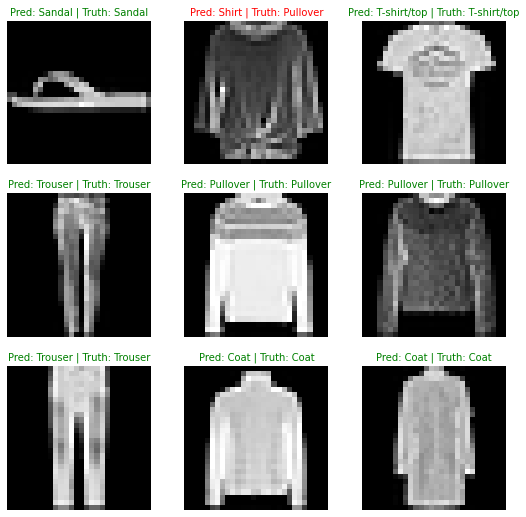

In [240]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    
    plt.axis(False)

### Making a confusion matrix

1. Make predictions with our trained model on the test dataset
2. make a confusion matric `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [241]:
# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred)
    
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:04<00:00, 77.99it/s]


tensor([9, 2, 1,  ..., 8, 1, 8])

In [243]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

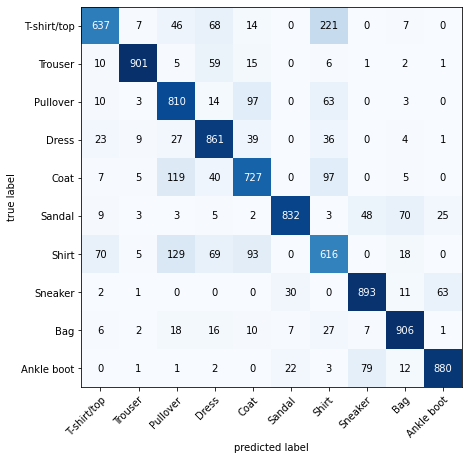

In [245]:
# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7))

### Save and load best model

In [247]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [249]:
# Create new instance of model 2
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [250]:
# Evaluate model 2 (double check it saved correctly)
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)


loaded_model_2_results, model_2_results

100%|██████████| 313/313 [00:03<00:00, 80.01it/s] 


({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3212989866733551,
  'model_acc': 88.37859424920129},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3212989866733551,
  'model_acc': 88.37859424920129})

In [251]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)